In [ ]:
import string 
import re
import nltk
from nltk.util import pr
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from nltk.corpus import stopwords
stemmer = nltk.SnowballStemmer('english')
nltk.download('stopwords')
stopword = set(stopwords.words('english'))

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter("ignore")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data =  pd.read_csv("labeled_data.csv")

In [ ]:
data.shape

(24783, 7)

In [ ]:
data.columns

Index(['index', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [ ]:
data.head

<bound method NDFrame.head of        index  count  hate_speech  offensive_language  neither  class  \
0          0      3            0                   0        3      2   
1          1      3            0                   3        0      1   
2          2      3            0                   3        0      1   
3          3      3            0                   2        1      1   
4          4      6            0                   6        0      1   
...      ...    ...          ...                 ...      ...    ...   
24778  25291      3            0                   2        1      1   
24779  25292      3            0                   1        2      2   
24780  25294      3            0                   3        0      1   
24781  25295      6            0                   6        0      1   
24782  25296      3            0                   0        3      2   

                                                   tweet  
0      !!! RT @mayasolovely: As a woman you sh

In [ ]:
data.tail

<bound method NDFrame.tail of        index  count  hate_speech  offensive_language  neither  class  \
0          0      3            0                   0        3      2   
1          1      3            0                   3        0      1   
2          2      3            0                   3        0      1   
3          3      3            0                   2        1      1   
4          4      6            0                   6        0      1   
...      ...    ...          ...                 ...      ...    ...   
24778  25291      3            0                   2        1      1   
24779  25292      3            0                   1        2      2   
24780  25294      3            0                   3        0      1   
24781  25295      6            0                   6        0      1   
24782  25296      3            0                   0        3      2   

                                                   tweet  
0      !!! RT @mayasolovely: As a woman you sh

In [ ]:
data.isnull().sum()

index                 0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [ ]:
data["labels"]= data["class"].map({0:"Hate Speech",
                                   1:"Offensive Language",
                                   2:"No Hate No Offensive"})

In [ ]:
print(data["labels"])

0        No Hate No Offensive
1          Offensive Language
2          Offensive Language
3          Offensive Language
4          Offensive Language
                 ...         
24778      Offensive Language
24779    No Hate No Offensive
24780      Offensive Language
24781      Offensive Language
24782    No Hate No Offensive
Name: labels, Length: 24783, dtype: object


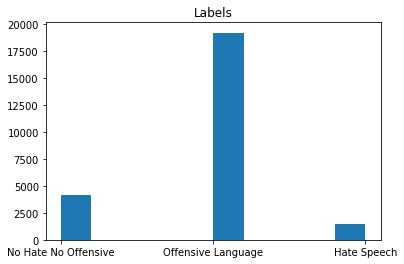

In [ ]:
plt.hist(data['labels'], bins =10)
plt.title('Labels')
plt.show()

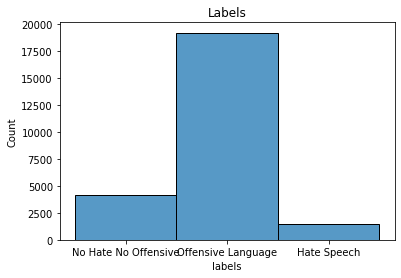

In [ ]:
sns.histplot(data['labels'], bins =10)
plt.title('Labels')
plt.show()

In [ ]:
data['hate_speech'].value_counts()

0    19790
1     3419
2     1251
3      287
4       21
5        7
6        5
7        3
Name: hate_speech, dtype: int64

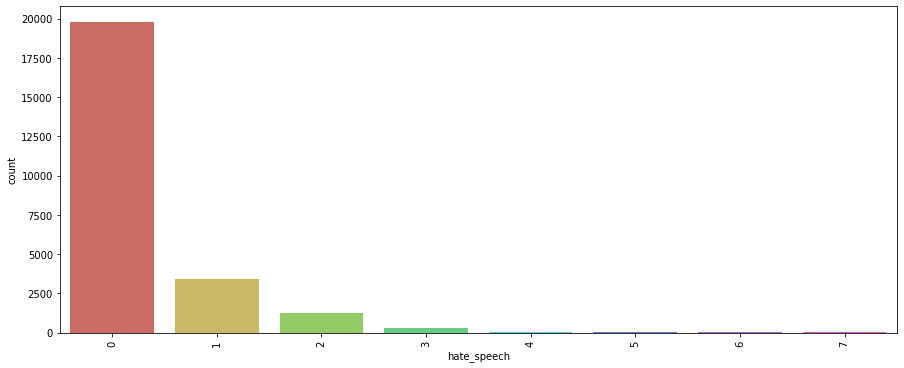

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('hate_speech', data = data, palette='hls')
plt.xticks(rotation=90)
plt.show()

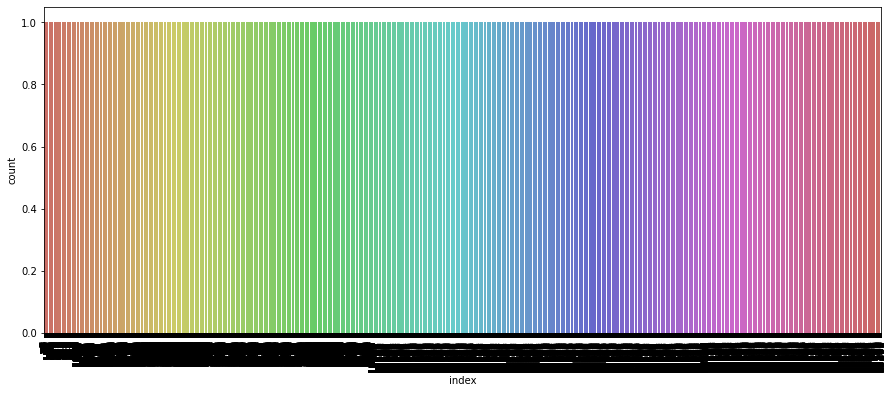

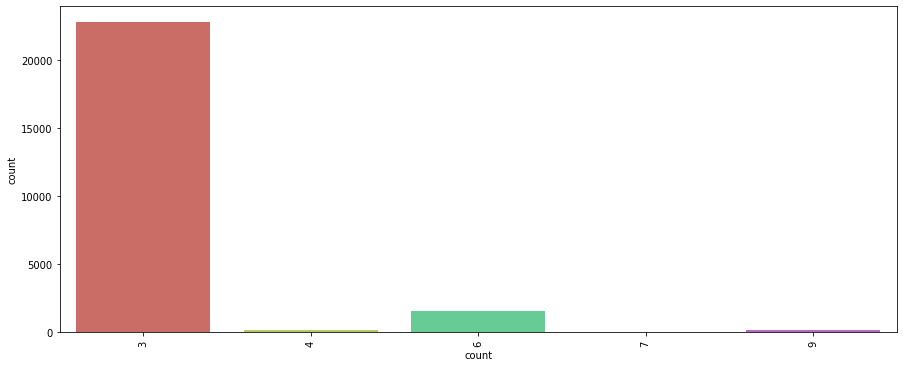

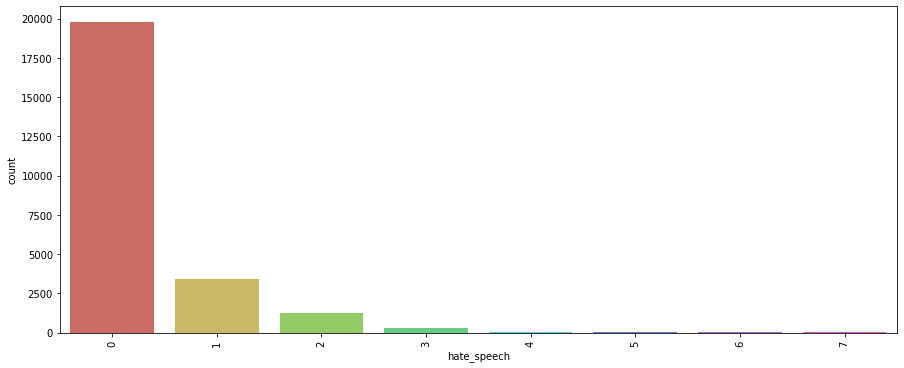

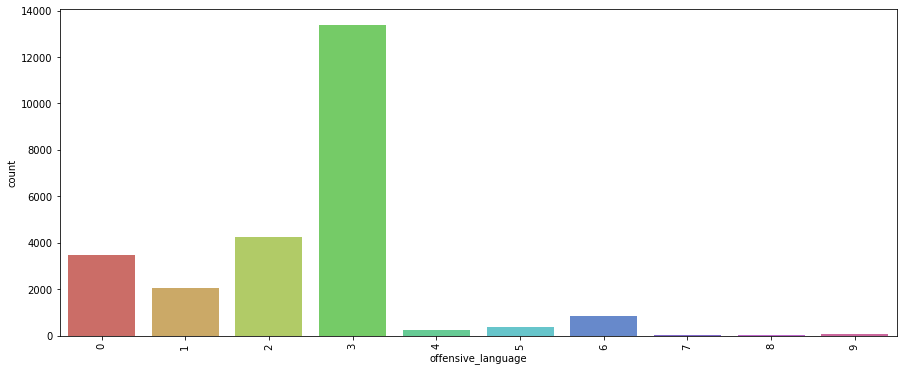

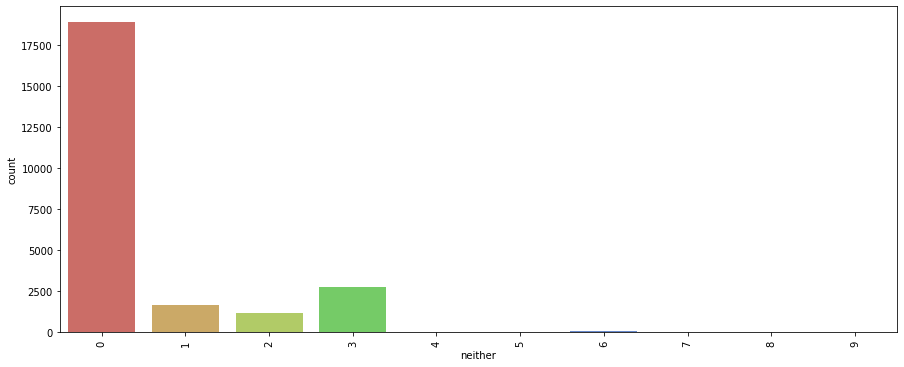

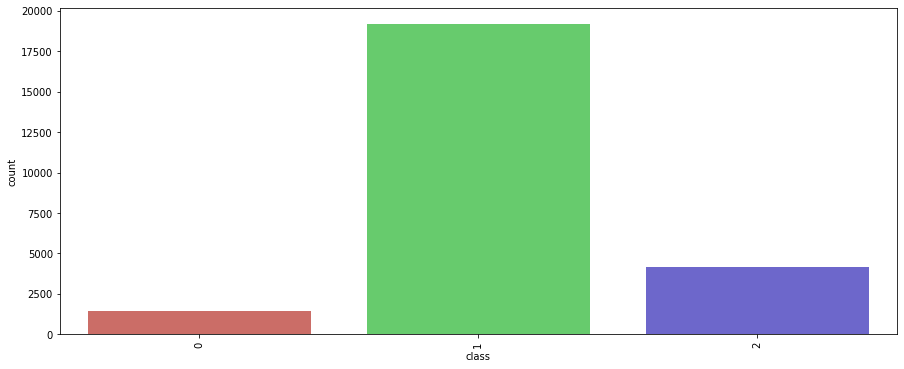

ValueError: ignored

<Figure size 1080x432 with 1 Axes>

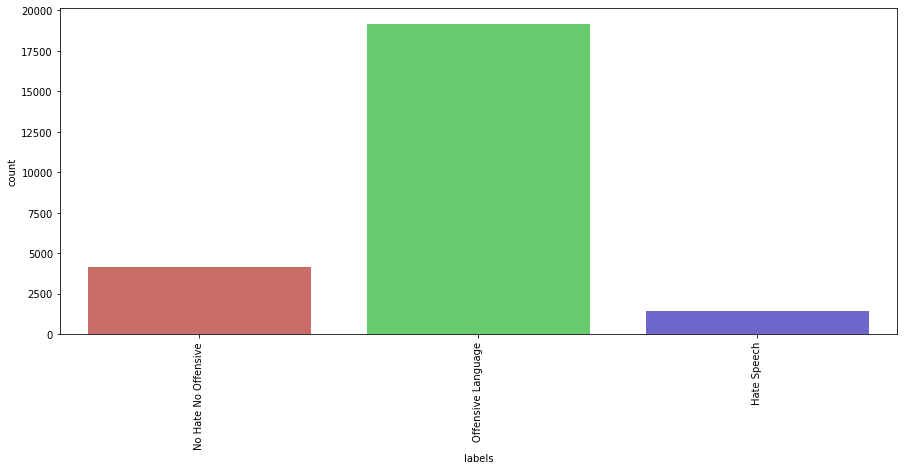

In [ ]:
for i in data.columns:
  plt.figure(figsize=(15,6))
  sns.countplot(i,data=data,palette='hls')
  plt.xticks(rotation=90)
  plt.show()
  

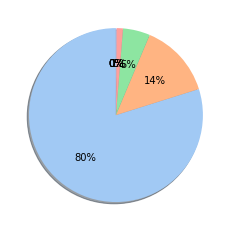

In [ ]:
colors = sns.color_palette('pastel')
plt.pie(data['hate_speech'].value_counts(),colors= colors,
        autopct = "%0.0f%%", shadow = 'True',startangle=90)
plt.show()

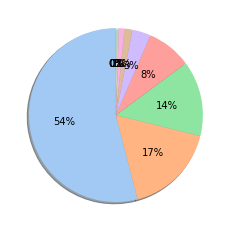

In [ ]:
colors = sns.color_palette('pastel')
plt.pie(data['offensive_language'].value_counts(),colors= colors,
        autopct = "%0.0f%%", shadow = 'True',startangle=90)
plt.show()

In [ ]:
for i in data.columns:
  colors = sns.color_palette('pastel')
  plt.pie(data[i].value_counts(),colors= colors,
  autopct = "%0.0f%%", shadow = 'True',startangle=90)
  plt.show() 
  

AttributeError: ignored

In [ ]:
data["total_length_characters"]= data["tweet"].str.len()
print(data['total_length_characters'])
total_length_characters = data['total_length_characters'].sum()
print(total_length_characters)
count=.0 
for y in data['tweet']:
  count=count+1
print(count)
average_length = total_length_characters/count
print(average_length)

In [ ]:
#cound the number of words
data["total_count_words"]= data["tweet"].str.split().str.len()
print(data['total_count_words'])
total_count_words = data['total_count_words'].sum()
print(total_count_words)
count=.0 
for y in data['tweet']:
  count=count+1
print(count)
average_words = total_count_words/count
print(average_length)

0        25
1        16
2        21
3         9
4        26
         ..
24778    19
24779    13
24780    13
24781     7
24782    18
Name: total_count_words, Length: 24783, dtype: int64
349857
24783.0
85.43493523786466


# New thingy

In [ ]:
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]','',text)
  text = re.sub('https?://\S+|www\S+','',text)
  text = re.sub('<.*?>+','',text)
  text = re.sub('[%s]'% re.escape(string.punctuation),
                '',text)
  text = re.sub('\n,','',text)
  text = re.sub('\w*\d\w*','',text)
  text = [word for word in text.split(' ') if word not in stopword]
  text = "".join(text)
  text = [stemmer.stem(word) for word in text.split()]
  text = ' '.join(text)
  return text
data['tweet'] = data['tweet'].apply(clean)

  

In [ ]:
data["total_length_characters"]= data["tweet"].str.len()
print(data['total_length_characters'])
total_length_characters = data['total_length_characters'].sum()
print(total_length_characters)
count=.0 
for y in data['tweet']:
  count=count+1
print(count)
average_length = total_length_characters/count
print(average_length)


0        69
1        39
2        54
3        35
4        54
         ..
24778    56
24779    45
24780    42
24781    24
24782    75
Name: total_length_characters, Length: 24783, dtype: int64
1080131
24783.0
43.58354517209377


In [ ]:
x = np.array(data['tweet'])
y = np.array(data['labels'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)
vectorizer.get_feature_names_out()
print(X.shape)

(24783, 25631)


In [ ]:
first_vector = X[0]
dataframe = pd.DataFrame(first_vector.T.todense(),index = vectorizer.get_feature_names(),
                         columns = ["tfidf"])
dataframe.sort_values(by = ["tfidf"],ascending =False)

,tfidf
rtmayasolovelywomanshouldntcomplaincleaninghouseampmanalwaystaketrash,1.0
aa,0.0
rtjoebuddenunfairhoesgetdresshoeshalloween,0.0
rtjohniknoniggastalkbitchesdaysoutdoorpoolpartytoday,0.0
rtjohnfkennedyonemanstrashanothermanswifefact,0.0
...,...
isdacoloredfolkallowedjoincuzhoodfolkworrieddawatermelongrowindachickensmal,0.0
iscoutgirlsverballyabruptbitchuaroundworldback,0.0
isanyoneuphuntermoorefucktightpussyimdrippingwet,0.0
isaidnickaknadnryegivecreditlilbitch,0.0


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters = i)
  km.fit_predict(X)
  wcss.append(km.inertia_)

In [ ]:
print(km.cluster_centers_)

[[2.49638460e-05 4.04448938e-05 4.04448938e-05 ... 4.04448938e-05
  2.38678765e-05 4.04448938e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)


DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Training Accuracy :",clf.score(X_train,y_train))
print("Testing Accuracy :",clf.score(X_test,y_test))

Training Accuracy : 0.9993375090339677
Testing Accuracy : 0.7734441863308473


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [1]:
matrix = confusion_matrix(X_train,y_pred)
print('Confusion matrix :\n' ,matrix)

NameError: ignored

In [ ]:
text1= "Hey, Myself Prateek !!! Your Machine is working properly"
data = vectorizer.transform([text1]).toarray()
print(clf.predict(data))

NotFittedError: ignored

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state=0)
classifier1.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier1.predict(X_test)

In [ ]:
print('Training Accuracy : ',classifier1.score(X_train,y_train))
print('Testing Accuracy : ',classifier1.score(X_test,y_test))

Training Accuracy :  0.7783064321850156
Testing Accuracy :  0.7731996576598607


In [ ]:
#fittung Decision tree classifier to the training set
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators=10,
                                    criterion = 'entropy')
classifier2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:

y_pred= classifier2.predict(X_test)

In [ ]:
text1 = ""
data = vectorizer.transform([text1]).toarray()
print(classifier2.predict(data))

['Offensive Language']
